In [1]:
import pandas as pd
from datetime import timedelta
%pylab inline

df_goog = pd.read_csv('../../assets/datasets/goog.csv')

Populating the interactive namespace from numpy and matplotlib


Take a high-level look at the data. Describe it. What are we looking at? Hint: We can use our `plot` function to provide a good visual.

In [2]:
df_goog.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995
1,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976
2,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998
3,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983
4,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000


In [4]:
len(df_goog)

22

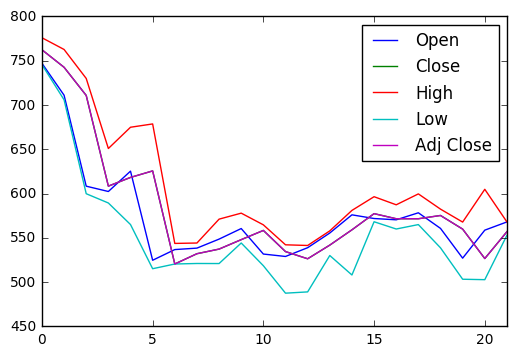

In [3]:
df_goog[['Open','Close','High','Low','Adj Close']].plot()

Looking a little deeper, let's gauge the integrity of our data. Is there any cleaning we can do? 

Let's examine the Date column. We should probably make it the index for our DataFrame, as we need to order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [5]:
df_goog.sort_values('Date', inplace=True)
df_goog.set_index('Date', inplace=True)
df_goog.index = pd.to_datetime(df_goog.index)

We need to convert the string to a DateTime object. Pandas has a built in function for this! Easy peasy. We should also ensure that the dates are sorted.

Let's add some more columns with useful data extracted from the DateTime index.

In [6]:
df_goog['Year'] = df_goog.index.year
df_goog['Month'] = df_goog.index.month
df_goog['Day'] = df_goog.index.day
df_goog.head(2)

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
Date,,,,,,,,,
2014-03-27,568.002563,568.002563,552.922546,556.972473,25300,556.972473,2014,3,27
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415,2014,4,1


Let's walk through adding a dummy variable to flag days where the Close price was higher than the Open price

In [7]:
df_goog.Open > df_goog.Close

Date
2014-03-27     True
2014-04-01     True
2014-05-01    False
2014-06-02    False
2014-07-01     True
2014-08-01    False
2014-09-02    False
2014-10-01     True
2014-11-03     True
2014-12-01     True
2015-01-02    False
2015-02-02    False
2015-03-02     True
2015-04-01     True
2015-05-01     True
2015-06-01     True
2015-07-01    False
2015-08-03     True
2015-09-01    False
2015-10-01    False
2015-11-02    False
2015-12-01    False
dtype: bool

In [8]:
pd.get_dummies(df_goog.Open > df_goog.Close)

,False,True
Date,,
2014-03-27,0,1
2014-04-01,0,1
2014-05-01,1,0
2014-06-02,1,0
2014-07-01,0,1
2014-08-01,1,0
2014-09-02,1,0
2014-10-01,0,1
2014-11-03,0,1


In [9]:
df_goog['Closed_Higher'] = df_goog.Open > df_goog.Close
df_goog.head(2)

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,Closed_Higher
Date,,,,,,,,,,
2014-03-27,568.002563,568.002563,552.922546,556.972473,25300,556.972473,2014,3,27,True
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415,2014,4,1,True


In [10]:
df_goog['Closed_Higher'] = pd.get_dummies(df_goog.Open > df_goog.Close)
df_goog.head(2)

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,Closed_Higher
Date,,,,,,,,,,
2014-03-27,568.002563,568.002563,552.922546,556.972473,25300,556.972473,2014,3,27,0
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415,2014,4,1,0


In [12]:
df_goog['Closed_Higher_v2'] = (df_goog.Open < df_goog.Close) * 1
df_goog.head(2)

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,Closed_Higher,Closed_Higher_v2
Date,,,,,,,,,,,
2014-03-27,568.002563,568.002563,552.922546,556.972473,25300,556.972473,2014,3,27,0,0
2014-04-01,558.712585,604.832764,502.802277,526.662415,3290800,526.662415,2014,4,1,0,0


We can use the DateTime object to access various different cuts of data using date attributes. For example, if we wanted to get all of the cuts from 2015, we would do as such:

In [23]:
df_goog.Open.resample('M').mean()

Date
2014-03-31    568.002563
2014-04-30    558.712585
2014-05-31    527.112366
2014-06-30    560.702576
2014-07-31    578.322632
2014-08-31    570.402588
2014-09-30    571.852539
2014-10-31    576.012634
2014-11-30    555.502502
2014-12-31    538.902466
2015-01-31    529.012390
2015-02-28    531.732361
2015-03-31    560.532532
2015-04-30    548.602417
2015-05-31    538.429993
2015-06-30    536.789978
2015-07-31    524.729980
2015-08-31    625.340027
2015-09-30    602.359985
2015-10-31    608.369995
2015-11-30    711.059998
2015-12-31    747.109985
Freq: M, Name: Open, dtype: float64

In [13]:
df_goog['2015']

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,Closed_Higher,Closed_Higher_v2
Date,,,,,,,,,,,
2015-01-02,529.012390,542.172424,487.562195,534.522461,2791200,534.522461,2015,1,2,1,1
2015-02-02,531.732361,564.712585,518.552307,558.402588,1841600,558.402588,2015,2,2,1,1
2015-03-02,560.532532,577.912598,544.222473,548.002441,1828900,548.002441,2015,3,2,0,0
2015-04-01,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,2015,4,1,0,0
2015-05-01,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,2015,5,1,0,0
2015-06-01,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,2015,6,1,0,0
2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,2015,7,1,1,1
2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,2015,8,3,0,0
2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,2015,9,1,1,1


Let's recall the TimeDelta object. We can use this to shift our entire index by a given offset.

In [14]:
df_goog.index + timedelta(days=1)

DatetimeIndex(['2014-03-28', '2014-04-02', '2014-05-02', '2014-06-03',
               '2014-07-02', '2014-08-02', '2014-09-03', '2014-10-02',
               '2014-11-04', '2014-12-02', '2015-01-03', '2015-02-03',
               '2015-03-03', '2015-04-02', '2015-05-02', '2015-06-02',
               '2015-07-02', '2015-08-04', '2015-09-02', '2015-10-02',
               '2015-11-03', '2015-12-02'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

On your own, try to shift the entire time series **both** forwards and backwards by the following intervals:
- 1 hour
- 3 days
- 12 years, 1 hour, and 43 seconds

## Discussion: Date ranges and Frequencies

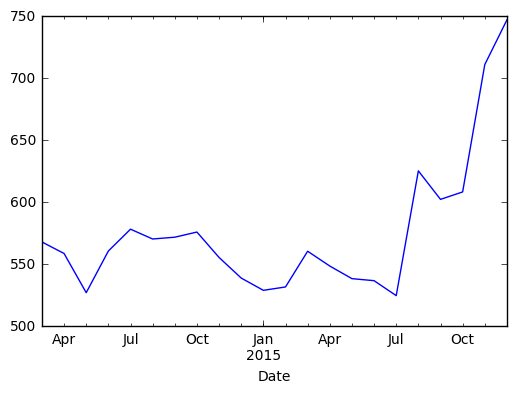

In [16]:
df_goog.Open.resample('M').mean().plot()

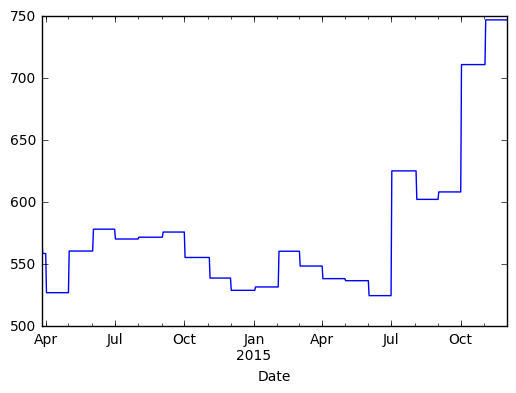

In [17]:
df_goog.Open.asfreq('D', method='backfill').plot()

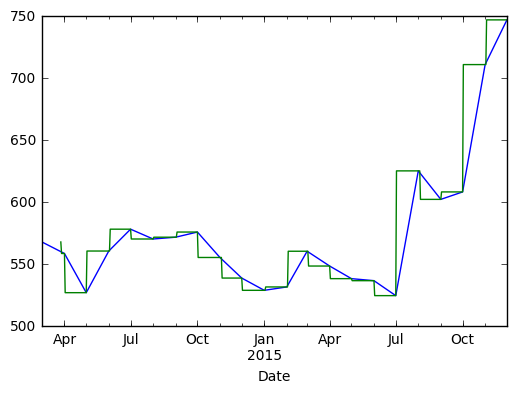

In [20]:
df_goog.Open.resample('M').mean().plot()
df_goog.Open.asfreq('D', method='backfill').plot()

Note that `asfreq` gives us a `method` keyword argument. Backfill, or bfill, will propogate the last valid observation forward. In other words, it will use the value preceding a range of unknown indices to fill in the unknowns. Inversely, pad, or ffill, will use the first value succeeding a range of unknown indices to fill in the unknowns.

Now, let's discuss the following points:
- What does `asfreq` do?
- What does `resample` do?
- What is the difference?
- When would we want to use each?

We can also create our own date ranges using a built in function, `date_range`. The `periods` and `freq` keyword arguments grant the user finegrained control over the resulting values. To reset the time data, use the `normalize=True` directive.

**NOTE:** See Reference B in the lesson notes for all of the available offset aliases

We are also given a Period object, which can be used to represent a time interval. The Period object consists of a start time and an end time, and can be created by providing a start time and a given frequency.

Each of these objects can be used to alter and access data from our DataFrames. We'll try those out in our Independent Practice in a moment.